In [2]:
import math
import numpy
from matplotlib import pyplot
%matplotlib inline

In [3]:
pyplot.rcParams['font.family']='serif'
pyplot.rcParams['font.size']=16

In [4]:
g=9.81
vt=30.0
CD=1.0/40
CL=1.0

v0=vt
theta0=0.0
x0=0.0
y0=1000.0

In [15]:
def rhs_phugoid(u, CL, CD, g, vt):
    """
    Returns the right-hand side of the phugoid system of equations.
    
    Parameters
    ----------
    u : list or numpy.ndarray
        Solution at the previous time step
        as a list or 1D array of four floats.
    CL : float
        Lift coefficient.
    CD : float
        Drag coefficient.
    g : float
        Gravitational acceleration.
    vt : float
        Trim velocity.
    
    Returns
    -------
    rhs : numpy.ndarray
        The right-hand side of the system
        as a 1D array of four floats.
    """
    v, theta, x, y = u
    rhs = numpy.array([-g * math.sin(theta) - CD / CL * g / vt**2 * v**2,
                       -g * math.cos(theta) / v + g / vt**2 * v,
                       v * math.cos(theta),
                       v * math.sin(theta)])
    return rhs


In [16]:
def euler_step(u,f,dt,*args):
    """
    Returns the solution at the next time step using Euler's method.
    
    Parameters
    ----------
    u:numpy.ndarray
      Solution at the previous time step
      as a 1D aay of floats.
    f:function
      Function to compute the right-hand side of the system.
    dt:float
       Time-tep size.
    args:tuple, optional
         Positional argumens to pass to the function f.
    
    Returns
    -------
    u_new:numpy.ndarray
         The solution at the next time step
         as a 1D array of floats.
    """
    u_new=u+dt*f(u,*args)
    return u_new

In [17]:
 T=100.0
dt=0.1
N=int(T/dt)+1

u=numpy.empty((N,4))

u[0]=numpy.array([v0,theta0,x0,y0])

for n in range(N-1):
    u[n+1]=euler_step(u[n],rhs_phugoid,dt,CL,CD,g,vt)

In [18]:
x=u[:,2]
y=u[:,3]

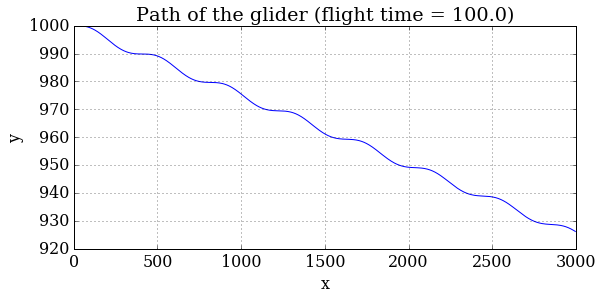

In [25]:
pyplot.figure(figsize=(9.0, 4.0))
pyplot.title('Path of the glider (flight time = {})'.format(T))
pyplot.xlabel('x')
pyplot.ylabel('y')
pyplot.grid()
pyplot.plot(x, y);

In [28]:
dt_values=[0.1,0.05,0.01,0.005,0.001]

u_values=[]

for dt in dt_values:
    N=int(T/dt)+1
    
    u=numpy.empty((N,4))
    
    u[0]=numpy.array([v0,theta0,x0,y0])
    
    for n in range(N-1):
        u[n+1]=euler_step(u[n],rhs_phugoid,dt,CL,CD,g,vt)
        
    u_values.append(u)

In [29]:


def l1_diff(u_coarse, u_fine, dt):
    """
    Returns the difference in the L1-norm between the solution on
    a coarse grid and the solution on a fine grid.
    
    Parameters
    ----------
    u_coarse : numpy.ndarray
        Solution on the coarse grid as an array of floats.
    u_fine : numpy.ndarray
        Solution on the fine grid as an array of floats.
    dt : float
        Time-step size.
    
    Returns
    -------
    diff : float
        The difference between the two solutions in the L1-norm
        scaled by the time-step size.
    """
    N_coarse = len(u_coarse)
    N_fine = len(u_fine)
    ratio = math.ceil(N_fine / N_coarse)
    diff = dt * numpy.sum(numpy.abs(u_coarse - u_fine[::ratio]))
    return diff

In [30]:
diff_values=[]

for i,dt in enumerate(dt_values[:-1]):
    diff=l1_diff(u_values[i][:,2],u_values[-1][:,2],dt)
    diff_values.append(diff)

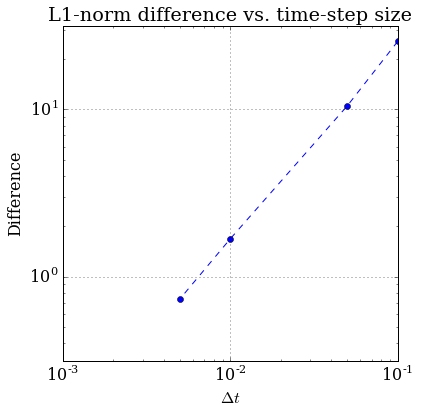

In [35]:
pyplot.figure(figsize=(6.0,6.0))
pyplot.title('L1-norm difference vs. time-step size')
pyplot.xlabel('$\Delta t$')
pyplot.ylabel('Difference')
pyplot.grid()
pyplot.loglog(dt_values[:-1],diff_values,
              linestyle='--',marker='o')
pyplot.axis('equal');

In [42]:
r=2
h=0.001

dt_values2=[h,r*h,r**2*h]
u_values2=[]

for dt in dt_values2:
    N=int(T/dt)+1
    
    u=numpy.empty((N,4))
    
    u[0]=numpy.array([v0,theta0,x0,y0])
    
    for n in range(N-1):
        u[n+1]=euler_step(u[n],rhs_phugoid,dt,CL,CD,g,vt)
    
    u_values2.append(u)
    
f2_f1 = l1_diff(u_values2[1][:, 2], u_values2[0][:, 2], dt_values2[1])

f3_f2 = l1_diff(u_values2[2][:, 2], u_values2[1][:, 2], dt_values2[2])

p=math.log(f3_f2/f2_f1)/math.log(r)
print('Observed order of convergence:p={:.3f}'.format(p))
    
    

Observed order of convergence:p=1.014
